In [1]:


suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

figure_theme_path <- file.path(
    "..","visulaization_utils", "figure_themes.R")
source(figure_theme_path)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [ ]:
# define command line arguments
parser <- ArgumentParser(description = "Visualize MLP results")
# add arguments
parser$add_argument('--celltype', type='character', help='Cell type to visualize')
parser$add_argument('--model_name', type='character', help='Model name to visualize')

# parse arguments from command line
args <- parser$parse_args()

# define cell type
celltype <- args$celltype
model_name <- args$model_name


In [2]:
celltype <- "SHSY5Y"
model_name <- "DMSO_0.025_vs_LPS_100"

In [3]:
output_file <- file.path(
    "..","..","figures","Binary_Classification",model_name,celltype,"pr_curves.png"
)

In [5]:
results_dir <- file.path(
    "..","..","results","Binary_Classification",model_name,celltype
)
results_file <- file.path(
    results_dir,"testing_metrics.csv"
)

# Read in the results file
df <- read.csv(results_file)
head(df,15)

,treatments_tested,model,group,shuffled_data,PR_Threshold,Precision,Recall
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,0.000000e+00,0.3096456,1.0000000
2,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.956502e-39,0.3086155,0.8379934
3,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.989937e-39,0.3086226,0.8379934
4,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.990347e-39,0.3086297,0.8379934
5,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.991625e-39,0.3086369,0.8379934
6,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,3.003631e-39,0.3086440,0.8379934
7,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,3.030818e-39,0.3086511,0.8379934
8,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,3.057761e-39,0.3086351,0.8379308
9,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,3.122211e-39,0.3086192,0.8378683


In [10]:
unique_treatments <- unique(df$treatments_tested)

In [11]:
for (treatment in 1:length(unique_treatments)){
    print(unique_treatments[treatment])
}


[1] "DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs Thapsigargin_1.000_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs Thapsigargin_10.000_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_0.100_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_1.000_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_10.000_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs Flagellin_0.100_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs Flagellin_1.000_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs Flagellin_1.000_Disulfiram_1.0"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_Nigericin_100.000_1.0_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_Nigericin_100.000_3.0_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_Nigericin_100.000_10.0_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_Nigericin_1.000_1.0_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_Nigericin_1.000_3.0_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs LPS_Nigericin_1.000_10.0_DMSO_0.025"
[1] "DMSO_0.100_DMSO_0.025 vs H2O2_100.000_Z-VAD-FMK_100.0"
[1] "DMSO_0.100_DMSO_0.0

In [12]:
unique_treatments[treatment]

[1] "LPS_0.010_DMSO_0.025 vs Thapsigargin_10.000_DMSO_0.025"

In [15]:
# subset the df to only include unique_treatments = treatment
tmp_df <- df[df$treatments_tested == unique_treatments[treatment],]


In [16]:
head(df)

,treatments_tested,model,group,shuffled_data,PR_Threshold,Precision,Recall
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,0.000000e+00,0.3096456,1.0000000
2,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.956502e-39,0.3086155,0.8379934
3,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.989937e-39,0.3086226,0.8379934
4,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.990347e-39,0.3086297,0.8379934
5,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,2.991625e-39,0.3086369,0.8379934
6,DMSO_0.100_DMSO_0.025 vs LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,test,True,3.003631e-39,0.3086440,0.8379934


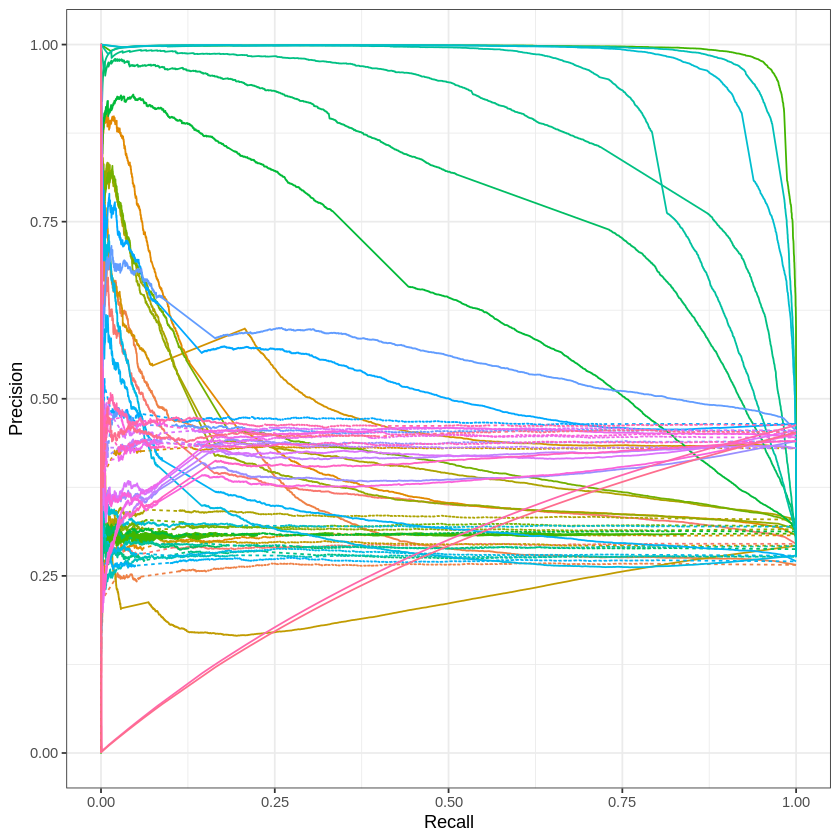

In [19]:


pr_curve_gg <- (
    ggplot(df, aes(x = Recall, y = Precision))
    + geom_line(aes(color = treatments_tested, linetype = shuffled_data))
    + theme_bw()
    + xlab("Recall")
    + ylab("Precision")
   
    # # set the colors of the lines
    # + scale_color_manual(
    #     name = "Data\nsplit",
    #     labels = data_split_labels,
    #     values = data_split_colors
    # )

    # + scale_linetype_manual(
    #     name = "Shuffled\ntraining\ndata",
    #     labels = shuffled_labels,
    #     values = shuffled_linetypes
    # )

    # + guides(
    #     color = guide_legend(order = 1),
    #     linetype = guide_legend(order = 2),
    # )
    # + coord_fixed()
    # + figure_theme
    # # Decrease spacing in legend
    # + theme(
    #     legend.spacing.y = unit(0.1, "cm"),
    #     legend.box.spacing = unit(0.2, "cm"),
    #     legend.key.size = unit(0.7, "lines"),
    #     legend.key.width = unit(1, "lines")
    # )
    # hide the legend
    + theme(
        legend.position = "none"
    )
)

# ggsave(output_file, pr_curve_gg, height = 5.5, width = 8.5, dpi = 500)

pr_curve_gg
     
